# DEMO OF LINEAR AND POLYNOMINAL REGRESSION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
df = pd.read_csv('autos.csv') # Read the csv data

# Analyze the relationship between car prices and age (year of registration) using a linear regression model and a polynomial model to suggest which cars provide the best value for money

## Remove outliers in both variables

In [78]:
# Remove cars that don't have repaired damage
df1 = df[df.notRepairedDamage == 'nein'] 
# Drop rows with missing data
df1 = df1.dropna() 
# Remove cars that have year of registratiom >= 2023!!!!
df1 = df1[df1.yearOfRegistration < 2023] 
# Remove cars that have year of registratiom in lower outliers
df1 = df1[df1.yearOfRegistration >= np.mean(df1.yearOfRegistration)-3*np.std(df1.yearOfRegistration)] 
# Keep cars that have price between 0 and 50000 outliers
df1 = df1[df1.price < 50000]
df1 = df1[df1.price >= 1]

### We are going to check so the relationship between car price and age for all the car types, but also for each car type separately. We are going also to fit so a linear model as a parabolic model (second order polynomial)

In [79]:
df1.vehicleType.unique() #Get the vehicle types

array(['kleinwagen', 'cabrio', 'limousine', 'suv', 'bus', 'coupe',
       'andere', 'kombi'], dtype=object)

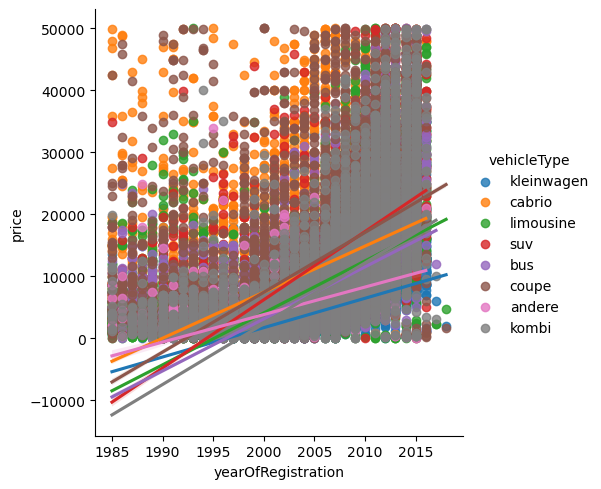

In [157]:
# Make the regression plot for each of the vehicle type
sns.lmplot(data = df1 ,y = "price",x = "yearOfRegistration" , hue="vehicleType")

kleinwagen
0.5600193261186011
[[474.36034308]]
[-947033.53952065]
cabrio
0.2583104987661258
[[743.87400096]]
[-1480330.78149836]
limousine
0.5009051194437927
[[838.72600136]]
[-1673380.01940948]
suv
0.414032122031625
[[1101.98729387]]
[-2197782.92907412]
bus
0.36686278432606967
[[839.6489797]]
[-1676196.52493737]
coupe
0.38569423149370485
[[965.75484683]]
[-1924108.12286538]
andere
0.2966822824381181
[[444.45837994]]
[-885119.72636462]
kombi
0.5490551936581762
[[982.0808428]]
[-1961830.85538605]


<Figure size 640x480 with 0 Axes>

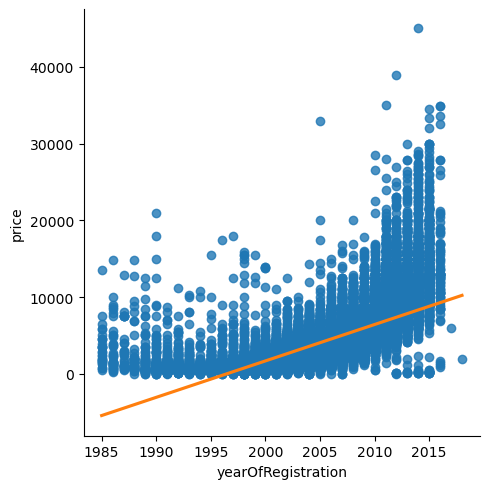

<Figure size 640x480 with 0 Axes>

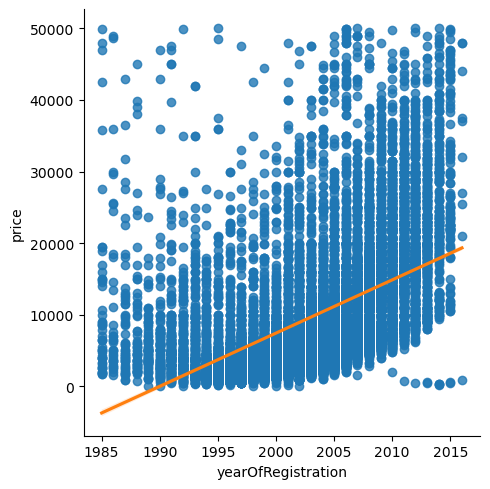

<Figure size 640x480 with 0 Axes>

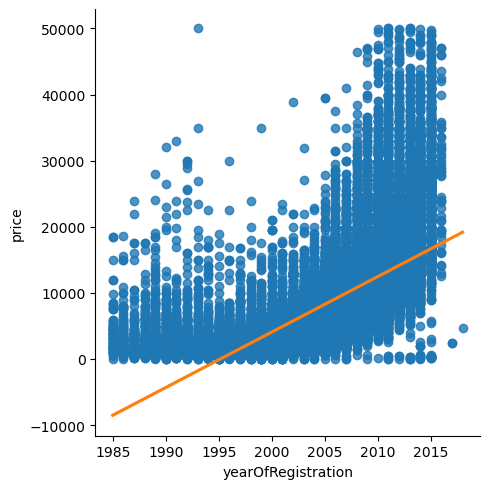

<Figure size 640x480 with 0 Axes>

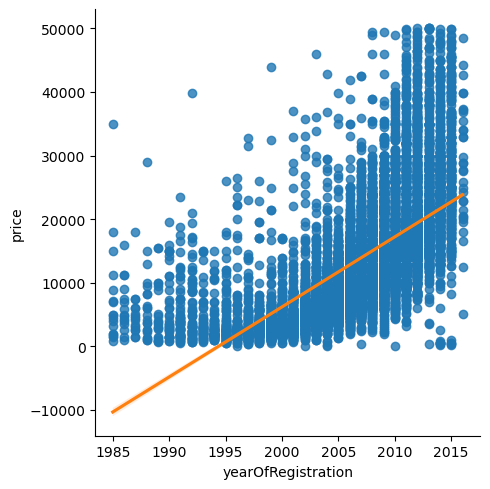

<Figure size 640x480 with 0 Axes>

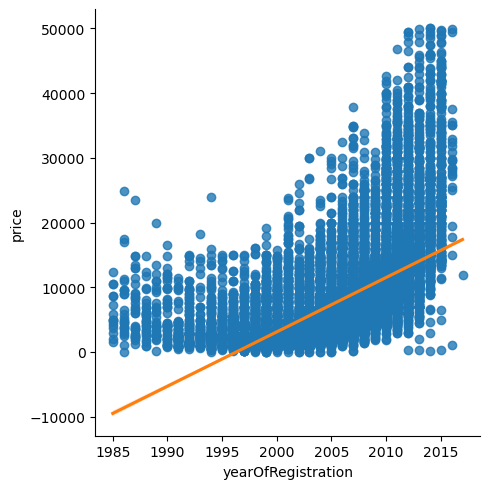

<Figure size 640x480 with 0 Axes>

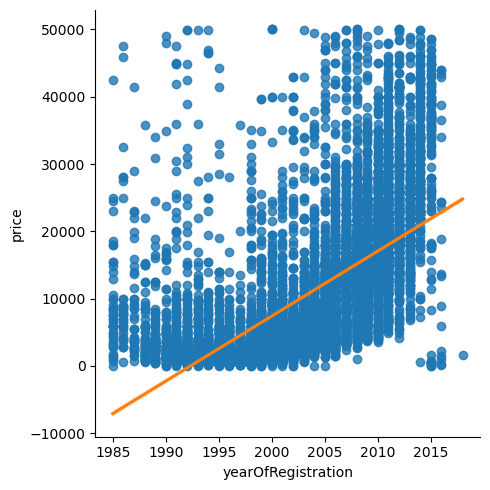

<Figure size 640x480 with 0 Axes>

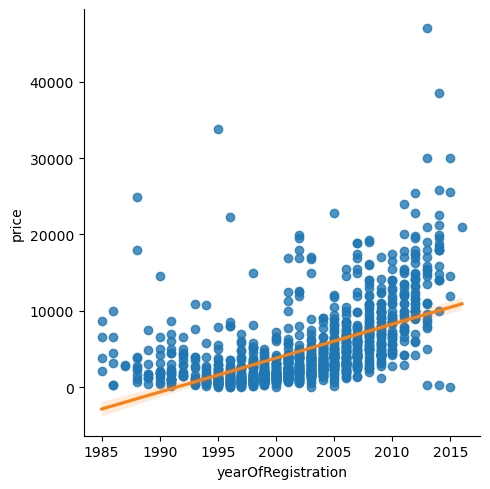

<Figure size 640x480 with 0 Axes>

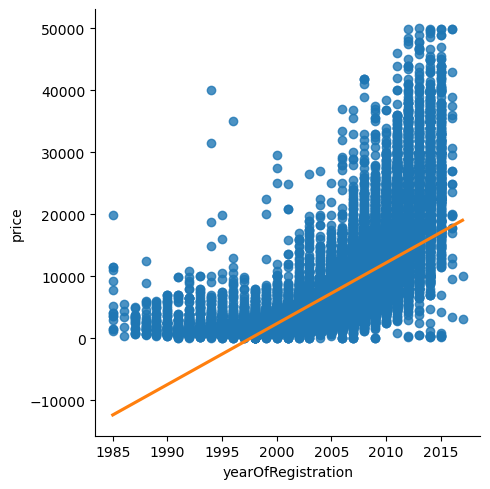

In [156]:
# Compute the regression parameters and the R^2 of each model
for vtype in df1.vehicleType.unique():
    df2 = df1[df1.vehicleType == vtype]
    print(vtype)
    plt.figure()
    sns.lmplot(data = df2 ,y = "price",x = "yearOfRegistration", line_kws={"color": "C1"})
    plt.plot()
    reg = LinearRegression().fit(df2.yearOfRegistration.values.reshape(-1, 1), df2.price.values.reshape(-1, 1))
    a = reg.score(df2.yearOfRegistration.values.reshape(-1, 1),df2.price.values.reshape(-1, 1),)
    print(a)
    print(reg.coef_)
    print(reg.intercept_)

In [106]:
# Compute the regression parameters and the R^2 of the overall model
reg = LinearRegression().fit(df1.price.values.reshape(-1, 1), df1.yearOfRegistration.values.reshape(-1, 1))
a = reg.score(df1.price.values.reshape(-1, 1), df1.yearOfRegistration.values.reshape(-1, 1))
print(a)
print(reg.coef_)
print(reg.intercept_)

0.3942783890898476
[[0.00048929]]
[2000.62574669]


## Results

For Kleinwagen we have $ R^2 = 0.56$ which means that 56% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0011*year+1999$

For cabrio we have $ R^2 = 0.25$ which means that 25% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0003*year+1999$

For limousine we have $ R^2 = 0.50$ which means that 50% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0005*year+1999$

For suv we have $ R^2 = 0.41$ which means that 41% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0003*year+2001$

For bus we have $ R^2 = 0.36$ which means that 36% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0004*year+2001$

For coupe we have $ R^2 = 0.38$ which means that 38% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0003*year+1999$

For andere we have $ R^2 = 0.29$ which means that 29% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0006*year+1999$

For kombi we have $ R^2 = 0.54$ which means that 54% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0005*year+2000$

While the overall model without considering the type has  $ R^2 = 0.34$ which means that 34% of the price variance was explained by the year of registration and the linear model for prediction is $price = 0.0004*year+2000$ 

In each case if we use the code ```python: predict(year)``` we can predict the value of a car considering it's year of registration. 

### Parabolic fitting (second order polynomial) 
For the purposes of this demo we will see only the fitting for the overall model. If someone wants to see the fitting according to each vehicle type the loop code above can be adapted and used

[ 6.06604041e+01 -2.42211414e+05  2.41783482e+08]


0.5122046827024447

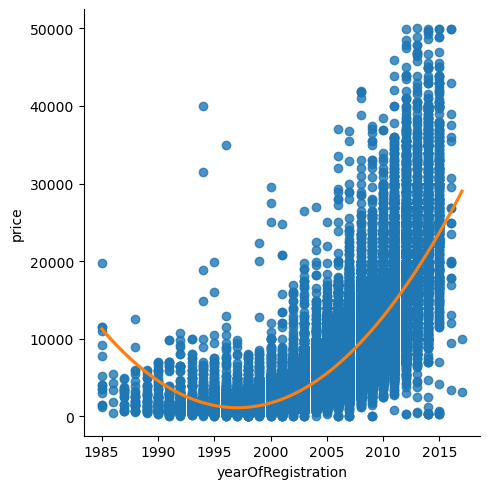

In [160]:
fit = np.polyfit(df1.yearOfRegistration, df1.price, 2)
print(fit)
predict = np.poly1d(fit)
sns.lmplot(data = df2 ,y = "price",x = "yearOfRegistration", order=2, line_kws={"color": "C1"})
r2 = r2_score(df1.price, predict(df1.yearOfRegistration))
r2

## Results
As we can see the overall model has better accuracty, compared to the linear regression, since the $R^2 = 0.51$ which means that our parabolic model explains the 51% of the price variance using the the year of registration. The parabolic model is $price = 60.6*year^2-242211*year+2417834820$

# Observations and Conlusions

1. The second model fits better the distrubtion of the data.
2. As we can see best value for money is a car with a registration around 1997-1998
3. We see that the prices of old cars are increased. This happens because the demand is higher than the offer. 